In [43]:

# All the required imports

import pandas as pd
import numpy as np
import os
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F
from torch import optim
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, mean_absolute_error
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
pd.pandas.set_option('display.max_columns',None)
%matplotlib inline 

In [24]:
# Exploring train.csv file
df = pd.read_csv('./train.csv')
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [26]:
print(df.isna().sum() / len(df))


PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64


In [27]:
df = df.dropna(axis=0, how="any")
df.info()
print(df.isna().sum() / len(df))

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB
PassengerId     0.0
HomePlanet      0.0
CryoSleep       0.0
Cabin           0.0
Destination     0.0
Age             0.0
VIP             0.0
RoomSer

In [46]:
df_objects = df.select_dtypes(include=["object"])
df_non_objects = df.select_dtypes(exclude=["object"])

In [47]:
print(df_non_objects.columns)

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

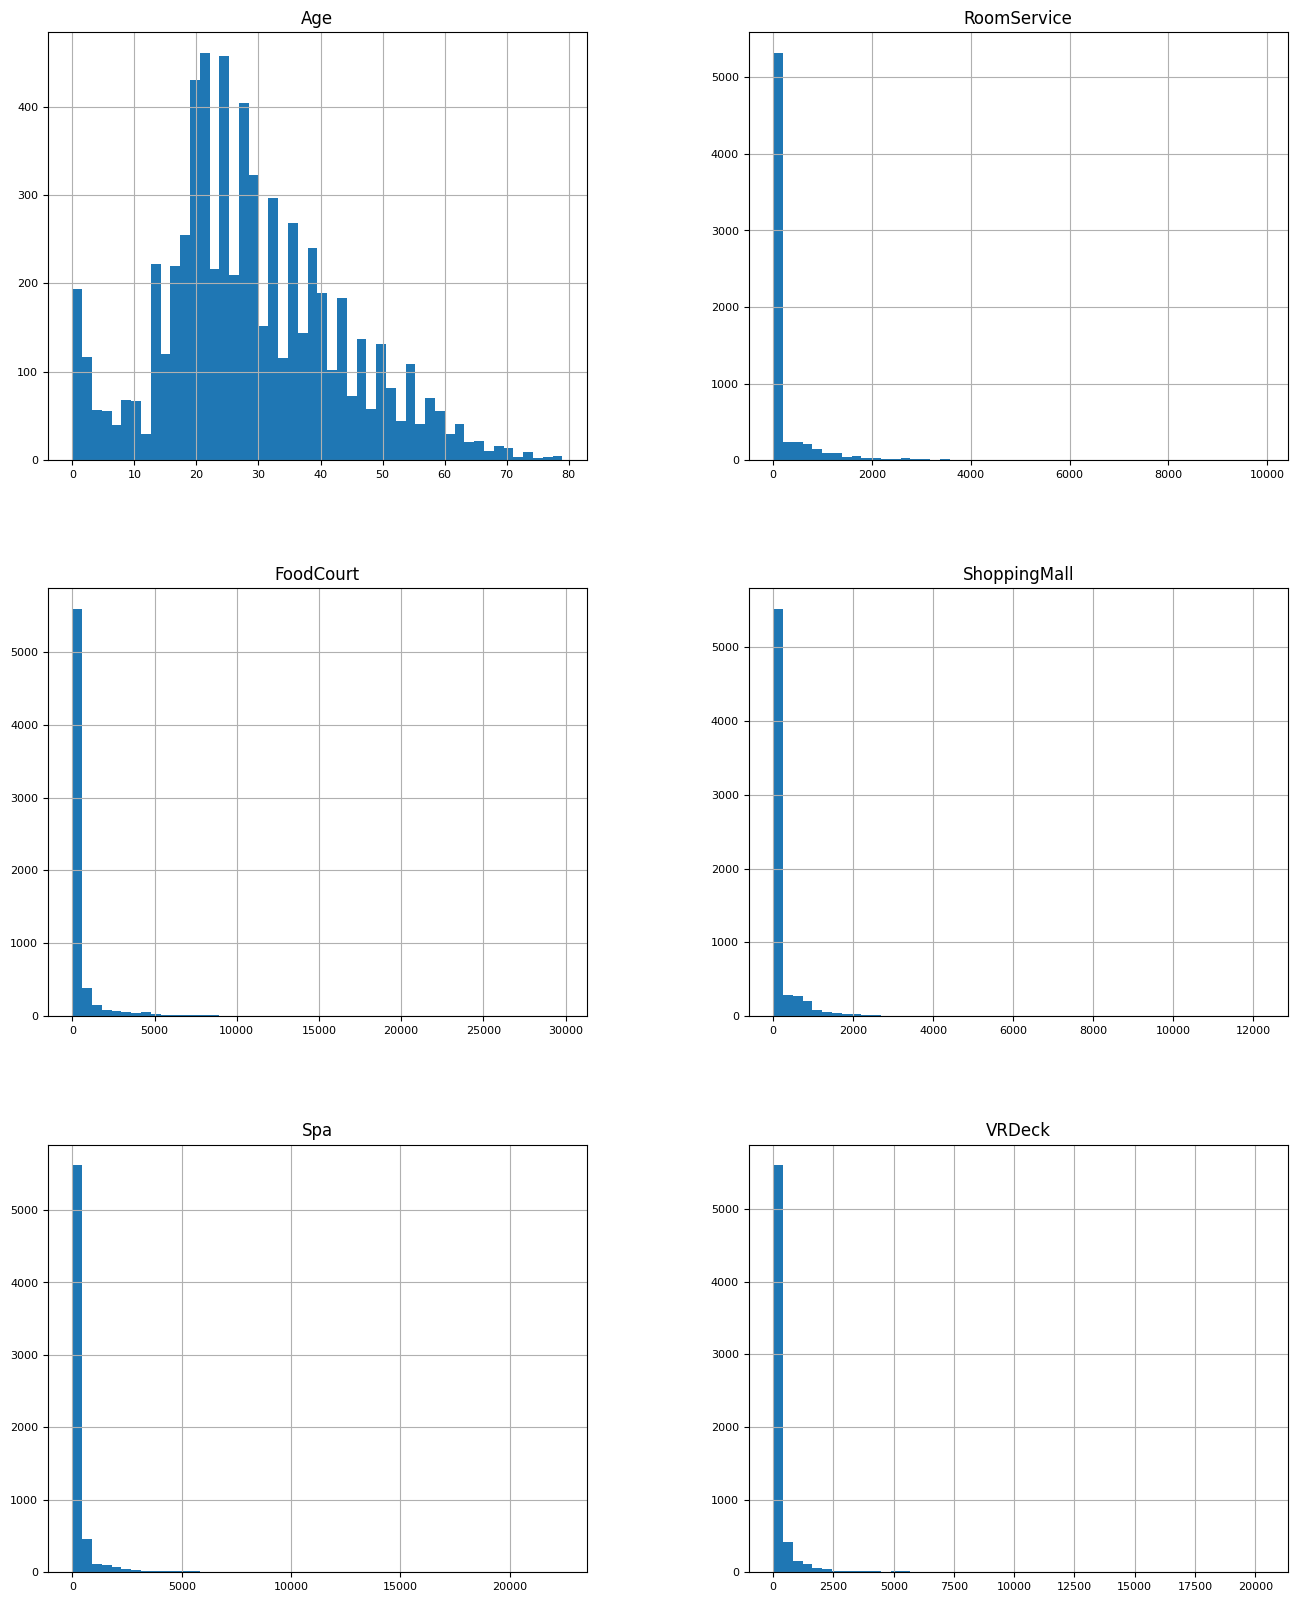

In [29]:
df_non_objects.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Handle object columns

In [48]:
df_objects.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,False,Sandie Hinetthews
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,False,Billex Jacostaffey
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,False,Andona Beston
9,0008_01,Europa,True,B/1/P,55 Cancri e,False,Erraiam Flatic
11,0008_03,Europa,False,B/1/P,55 Cancri e,False,Wezena Flatic


In [49]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

cate_fea_part1 = ["HomePlanet", "CryoSleep", "Destination", "VIP"]
for fea in cate_fea_part1:
    df_objects[fea] = label_encoder.fit_transform(df_objects[fea])
df_objects.head(10) 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,1,0,B/0/P,2,0,Maham Ofracculy
1,0002_01,0,0,F/0/S,2,0,Juanna Vines
2,0003_01,1,0,A/0/S,2,1,Altark Susent
3,0003_02,1,0,A/0/S,2,0,Solam Susent
4,0004_01,0,0,F/1/S,2,0,Willy Santantines
5,0005_01,0,0,F/0/P,1,0,Sandie Hinetthews
6,0006_01,0,0,F/2/S,2,0,Billex Jacostaffey
8,0007_01,0,0,F/3/S,2,0,Andona Beston
9,0008_01,1,1,B/1/P,0,0,Erraiam Flatic
11,0008_03,1,0,B/1/P,0,0,Wezena Flatic


In [51]:
cate_fea_part2 = ["Deck", "Num", "Side"]
df_objects[cate_fea_part2] = df_objects["Cabin"].str.split('/', expand=True)
# df_objects["Cabin"].str.split('/', expand=True).head(10)
df_objects.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,deck,num,side,Deck,Num,Side
0,0001_01,1,0,B/0/P,2,0,Maham Ofracculy,B,0,P,B,0,P
1,0002_01,0,0,F/0/S,2,0,Juanna Vines,F,0,S,F,0,S
2,0003_01,1,0,A/0/S,2,1,Altark Susent,A,0,S,A,0,S
3,0003_02,1,0,A/0/S,2,0,Solam Susent,A,0,S,A,0,S
4,0004_01,0,0,F/1/S,2,0,Willy Santantines,F,1,S,F,1,S
5,0005_01,0,0,F/0/P,1,0,Sandie Hinetthews,F,0,P,F,0,P
6,0006_01,0,0,F/2/S,2,0,Billex Jacostaffey,F,2,S,F,2,S
8,0007_01,0,0,F/3/S,2,0,Andona Beston,F,3,S,F,3,S
9,0008_01,1,1,B/1/P,0,0,Erraiam Flatic,B,1,P,B,1,P
11,0008_03,1,0,B/1/P,0,0,Wezena Flatic,B,1,P,B,1,P


In [52]:
cate_fea_part2 = ["Deck", "Side"]
for fea in cate_fea_part2:
    df_objects[fea] = label_encoder.fit_transform(df_objects[fea])
df_objects.head(10) 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,deck,num,side,Deck,Num,Side
0,0001_01,1,0,B/0/P,2,0,Maham Ofracculy,B,0,P,1,0,0
1,0002_01,0,0,F/0/S,2,0,Juanna Vines,F,0,S,5,0,1
2,0003_01,1,0,A/0/S,2,1,Altark Susent,A,0,S,0,0,1
3,0003_02,1,0,A/0/S,2,0,Solam Susent,A,0,S,0,0,1
4,0004_01,0,0,F/1/S,2,0,Willy Santantines,F,1,S,5,1,1
5,0005_01,0,0,F/0/P,1,0,Sandie Hinetthews,F,0,P,5,0,0
6,0006_01,0,0,F/2/S,2,0,Billex Jacostaffey,F,2,S,5,2,1
8,0007_01,0,0,F/3/S,2,0,Andona Beston,F,3,S,5,3,1
9,0008_01,1,1,B/1/P,0,0,Erraiam Flatic,B,1,P,1,1,0
11,0008_03,1,0,B/1/P,0,0,Wezena Flatic,B,1,P,1,1,0


In [53]:
choosen_object_feas = cate_fea_part1 + cate_fea_part2
df_choosen_objects = df_objects[choosen_object_feas]
df_choosen_objects.head(5)

,HomePlanet,CryoSleep,Destination,VIP,Deck,Side
0,1,0,2,0,1,0
1,0,0,2,0,5,1
2,1,0,2,1,0,1
3,1,0,2,0,0,1
4,0,0,2,0,5,1


In [54]:
df_final_table = pd.concat([df_choosen_objects, df_non_objects], axis=1)
df_final_table.head(5)

,HomePlanet,CryoSleep,Destination,VIP,Deck,Side,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,0,1,0,39.0,0.0,0.0,0.0,0.0,0.0,False
1,0,0,2,0,5,1,24.0,109.0,9.0,25.0,549.0,44.0,True
2,1,0,2,1,0,1,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,1,0,2,0,0,1,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,0,0,2,0,5,1,16.0,303.0,70.0,151.0,565.0,2.0,True


In [55]:
labels = np.array(df_final_table["Transported"], np.int32)
data = np.array(df_final_table.drop(columns="Transported", inplace=False), dtype=np.float64)

Split into train and val datasets and process NAN value

In [56]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42, shuffle=True)
# my_imputer = SimpleImputer(strategy="most_frequent")
# x_train = my_imputer.fit_transform(x_train)
# x_test = my_imputer.fit_transform(x_test)

In [57]:
model_xgb = XGBClassifier(n_estimators=100, random_state=42)
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [58]:
y_pred_xgb = model_xgb.predict(x_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(acc_xgb)

0.8093797276853253


In [100]:
model_forest = RandomForestClassifier(n_estimators=100, random_state=42)
model_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [101]:
y_pred_forest = model_forest.predict(x_test)
acc_forest = accuracy_score(y_test, y_pred_forest)
print(acc_forest)

0.8199697428139183


In [98]:
model_forest_2 = RandomForestClassifier(n_estimators=1000, random_state=42)
model_forest_2.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [99]:
y_pred_forest_2 = model_forest_2.predict(x_test)
acc_forest_2 = accuracy_score(y_test, y_pred_forest_2)
print(acc_forest_2)

0.81089258698941


In [67]:
feature_importance = model_forest.feature_importances_
feature_table = pd.DataFrame({"feature": df_final_table.drop(columns="Transported", inplace=False).columns, "importance": feature_importance})
feature_table.sort_values("importance", ascending=False)

,feature,importance
6,Age,0.175182
1,CryoSleep,0.128533
10,Spa,0.125847
11,VRDeck,0.108283
7,RoomService,0.107913
8,FoodCourt,0.105451
9,ShoppingMall,0.092063
4,Deck,0.065263
0,HomePlanet,0.039219
2,Destination,0.026853


Handle Test Table

In [73]:
# Reading sample_submission file to get the test image names
test_table = pd.read_csv('./test.csv')
test_table.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [74]:
test_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [75]:
test_table_objects = test_table.select_dtypes(include=["object"])
test_table_objects.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,False,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,False,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,False,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,False,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,False,Brence Harperez


In [76]:
test_table_non_objects = test_table.select_dtypes(exclude=["object"])
test_table_non_objects.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,27.0,0.0,0.0,0.0,0.0,0.0
1,19.0,0.0,9.0,0.0,2823.0,0.0
2,31.0,0.0,0.0,0.0,0.0,0.0
3,38.0,0.0,6652.0,0.0,181.0,585.0
4,20.0,10.0,0.0,635.0,0.0,0.0


Handle object features (Note: here labelencoder should not be created again bc we want to use the same labeling as before)

In [80]:
cate_fea_part1 = ["HomePlanet", "CryoSleep", "Destination", "VIP"]
for fea in cate_fea_part1:
    test_table_objects[fea] = label_encoder.fit_transform(test_table_objects[fea])
test_table_objects.head() 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0013_01,0,1,G/3/S,2,0,Nelly Carsoning
1,0018_01,0,0,F/4/S,2,0,Lerome Peckers
2,0019_01,1,1,C/0/S,0,0,Sabih Unhearfus
3,0021_01,1,0,C/1/S,2,0,Meratz Caltilter
4,0023_01,0,0,F/5/S,2,0,Brence Harperez


In [81]:
cate_fea_part2 = ["Deck", "Num", "Side"]
test_table_objects[cate_fea_part2] = test_table_objects["Cabin"].str.split('/', expand=True)
# df_objects["Cabin"].str.split('/', expand=True).head(10)
test_table_objects.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Deck,Num,Side
0,0013_01,0,1,G/3/S,2,0,Nelly Carsoning,G,3,S
1,0018_01,0,0,F/4/S,2,0,Lerome Peckers,F,4,S
2,0019_01,1,1,C/0/S,0,0,Sabih Unhearfus,C,0,S
3,0021_01,1,0,C/1/S,2,0,Meratz Caltilter,C,1,S
4,0023_01,0,0,F/5/S,2,0,Brence Harperez,F,5,S


In [82]:
cate_fea_part2 = ["Deck", "Side"]
for fea in cate_fea_part2:
    test_table_objects[fea] = label_encoder.fit_transform(test_table_objects[fea])
test_table_objects.head(10) 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Deck,Num,Side
0,0013_01,0,1,G/3/S,2,0,Nelly Carsoning,6,3,1
1,0018_01,0,0,F/4/S,2,0,Lerome Peckers,5,4,1
2,0019_01,1,1,C/0/S,0,0,Sabih Unhearfus,2,0,1
3,0021_01,1,0,C/1/S,2,0,Meratz Caltilter,2,1,1
4,0023_01,0,0,F/5/S,2,0,Brence Harperez,5,5,1
5,0027_01,0,0,F/7/P,2,0,Karlen Ricks,5,7,0
6,0029_01,1,1,B/2/P,0,0,Aldah Ainserfle,1,2,0
7,0032_01,1,1,D/0/S,2,0,Acrabi Pringry,3,0,1
8,0032_02,1,1,D/0/S,0,0,Dhena Pringry,3,0,1
9,0033_01,0,0,F/7/S,0,0,Eliana Delazarson,5,7,1


In [83]:
choosen_object_feas = cate_fea_part1 + cate_fea_part2
test_table_choosen_objects = test_table_objects[choosen_object_feas]
test_table_choosen_objects.head(5)

,HomePlanet,CryoSleep,Destination,VIP,Deck,Side
0,0,1,2,0,6,1
1,0,0,2,0,5,1
2,1,1,0,0,2,1
3,1,0,2,0,2,1
4,0,0,2,0,5,1


In [84]:
test_final_table = pd.concat([test_table_choosen_objects, test_table_non_objects], axis=1)
test_final_table.head(5)

,HomePlanet,CryoSleep,Destination,VIP,Deck,Side,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,2,0,6,1,27.0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,0,5,1,19.0,0.0,9.0,0.0,2823.0,0.0
2,1,1,0,0,2,1,31.0,0.0,0.0,0.0,0.0,0.0
3,1,0,2,0,2,1,38.0,0.0,6652.0,0.0,181.0,585.0
4,0,0,2,0,5,1,20.0,10.0,0.0,635.0,0.0,0.0


In [85]:
test_data = test_final_table.to_numpy(dtype=np.float64)
# test_data = my_imputer.fit_transform(test_data)

In [87]:
predicted = model_forest.predict(test_data)
print(predicted[:10])

[1 0 1 1 0 1 1 1 1 1]


In [96]:
submission = pd.DataFrame({"PassengerId": test_table["PassengerId"].to_numpy(),
                           "Transported": predicted
                           })
submission["Transported"] = submission["Transported"].astype(dtype=bool)
print(submission.head())

  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False


In [97]:
#saving submission file
submission.to_csv('submission_1.csv', index=False, encoding='utf-8')